# Assignment 2

## Coding exercise:

### a) Generate random variable and plot bivariate Gaussian distribution (PDF) in 3D plan alongwith contours.
### b) Provide atleast three plots by varying the values of variance, correlation coefficient and mean of Gaussian distribution.
### c) Observe the plots and comments on it.

In [ ]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

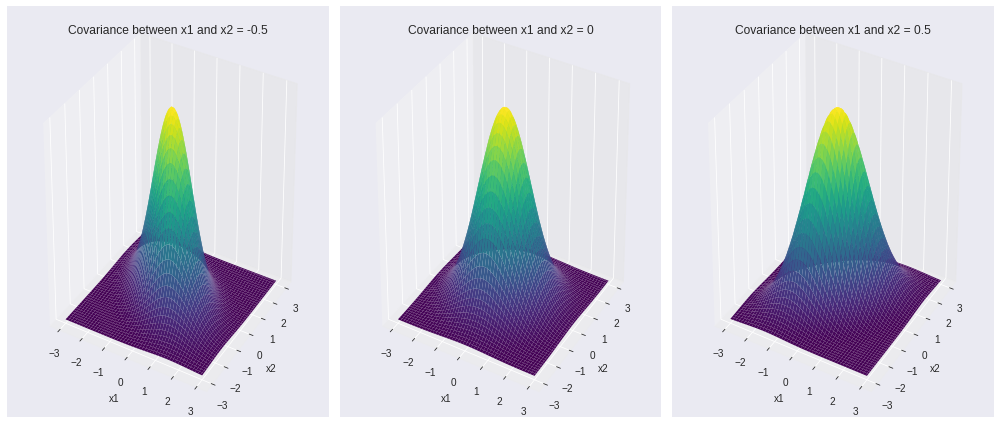

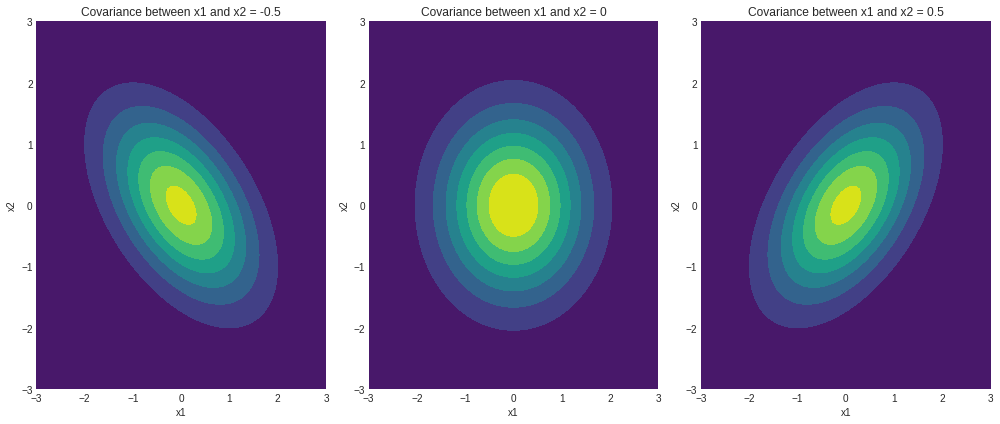

In [ ]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance covariance values
cov_val = [-0.5, 0, 0.5]

# Setting mean of the distribution to be at (0,0)
mean = np.array([0,0])

# Storing density function values for further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):

	# Initializing the covariance matrix
	cov = np.array([[1, val], [val, 1]])

	# Generating a Gaussian bivariate distribution with given mean and covariance matrix
	distr = multivariate_normal(cov = cov, mean = mean, seed = random_seed)

	# Generating a meshgrid complacent with the 3-sigma boundary
	mean_1, mean_2 = mean[0], mean[1]
	sigma_1, sigma_2 = cov[0,0], cov[1,1]

	x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
	y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
	X, Y = np.meshgrid(x,y)

	# Generating the density function for each point in the meshgrid
	pdf = np.zeros(X.shape)
	for i in range(X.shape[0]):
		for j in range(X.shape[1]):
			pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

	# Plotting the density function values
	key = 131+idx
	ax = fig.add_subplot(key, projection = '3d')
	ax.plot_surface(X, Y, pdf, cmap = 'viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {val}')
	pdf_list.append(pdf)
	ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

# Plotting contour plots
for idx, val in enumerate(pdf_list):
	plt.subplot(1,3,idx+1)
	plt.contourf(X, Y, val, cmap='viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()


In the above code we generated 3 different Gaussian bivariate distributions with same mean,
mu = \begin{bmatrix}0\\[1ex]0\end{bmatrix}      but different covariance matrices.
If the covariance value is positive, that means that if we go in a direction where x1 increases then x2 will increase in that direction also and vice versa, as in the figure on the right. Similarly, if the value is negative that means x2 will decrease in the direction of an increase in x1, as in the figure on the left. The middle figure has covariance 0, hence the symmetric shape.